<a href="https://colab.research.google.com/github/pjprathmesh/Music-Generator/blob/master/midiv2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip
!unzip /content/maestro-v2.0.0-midi.zip

In [ ]:
!pip install pretty_midi

In [5]:
import pretty_midi
import numpy as np
import os
from keras.layers import LSTM,Input,Dense,Dropout
from keras.models import Model
from keras.callbacks import LambdaCallback
from keras.utils   import to_categorical
def create():
    max_T_x = 1000
    l1=os.listdir("/content/maestro-v2.0.0")
    l2=[i for i in l1 if i.isnumeric() ]
    l3=[os.listdir(os.path.join("/content/maestro-v2.0.0",j)) for j in l2]

    mapp=[i for i in range(109)]
    char2vec={e:i for e,i in enumerate(mapp)}
    vec2char={i:e for e,i in enumerate(mapp)}

    ma=0
    final=np.zeros((25179,20,110))
    pre=np.zeros((25179,20,110))
    for e,i in enumerate(l3):
        if e==7:
            break

        for h,j in enumerate(i):
            if h==11:
              break
              
            midi_pretty_format = pretty_midi.PrettyMIDI(os.path.join("/content/maestro-v2.0.0",l2[e],j))
            note_l = [note.pitch for note in midi_pretty_format.instruments[0].notes][:1000]
            for k in range(0,len(note_l)-20,3):
                final_vt=note_l[k:k+20]
                pred=final_vt.copy()
                del final_vt[-1]
                final_vt=[0]+final_vt

                try:
                    final_v=to_categorical(final_vt,110)
                    pre[ma]=to_categorical(pred,110)
                    final[ma]=final_v
                except:
                    pass
                ma+=1
                print(ma)
            
    yield final,pre
      
    print("done")
aio=list(create())

Streaming output truncated to the last 5000 lines.
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20302
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20318
20319
20320
20321
20322
20323
20324
20325
20326
20327
20328
20329
20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
2

In [6]:
aio[0][0].shape,aio[0][1].shape,

((25179, 20, 110), (25179, 20, 110))

In [7]:
xx=aio[0][0].copy()
yy=aio[0][1].copy()

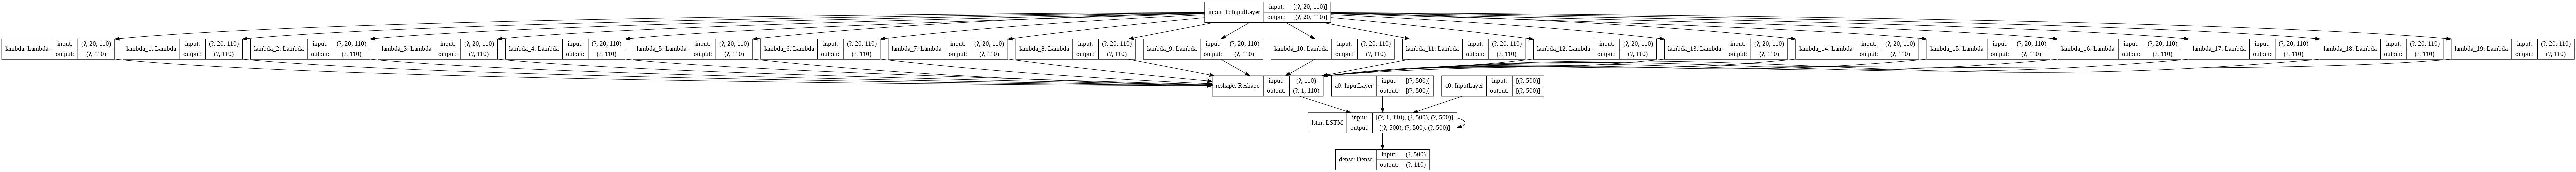

In [8]:
import keras
from keras.layers import Reshape,Lambda,Input
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

n_a=500
n_values=110
Tx=20
reshapor = Reshape((1, n_values))
LSTM_cell = LSTM(n_a, return_state = True)
densor = Dense(n_values, activation='softmax') 


X = Input(shape=(Tx, n_values))
a00 = Input(shape=(n_a,), name='a0')
c00 = Input(shape=(n_a,), name='c0')
a=a00
c=c00
outputs = []
    
for t in range(Tx):
        
        x = Lambda(lambda x: X[:,t,:])(X)
        x = reshapor(x)
        a, _, c = LSTM_cell(inputs=x, initial_state=[a, c])
        out = densor(a)
        outputs.append(out)
        
model = Model(inputs=[X, a00, c00], outputs=outputs)


from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
model.layers[0].output

<tf.Tensor 'input_2:0' shape=(None, 20, 110) dtype=float32>

In [ ]:
from keras.optimizers import Adam

opt = Adam(lr=0.01)# beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
m = 25179
n_a=500
h_s = np.zeros((m, n_a))
c_s = np.zeros((m, n_a))
Y=np.transpose(yy,(1,0,2))
model.fit(x=[xx, h_s, c_s], y=list(Y), epochs=10)

Train on 25179 samples
Epoch 1/10
25179/25179 [==============================] - 33s 1ms/sample - loss: 65.3202 - dense_loss: 3.9913 - dense_1_loss: 3.7416 - dense_2_loss: 3.5721 - dense_3_loss: 3.4434 - dense_4_loss: 3.3308 - dense_5_loss: 3.2502 - dense_6_loss: 3.2109 - dense_7_loss: 3.1628 - dense_8_loss: 3.1525 - dense_9_loss: 3.1442 - dense_10_loss: 3.1253 - dense_11_loss: 3.1302 - dense_12_loss: 3.1388 - dense_13_loss: 3.1184 - dense_14_loss: 3.1363 - dense_15_loss: 3.1469 - dense_16_loss: 3.1228 - dense_17_loss: 3.1339 - dense_18_loss: 3.1420 - dense_19_loss: 3.1243 - dense_accuracy: 0.0303 - dense_1_accuracy: 0.0719 - dense_2_accuracy: 0.1000 - dense_3_accuracy: 0.1223 - dense_4_accuracy: 0.1400 - dense_5_accuracy: 0.1562 - dense_6_accuracy: 0.1623 - dense_7_accuracy: 0.1689 - dense_8_accuracy: 0.1702 - dense_9_accuracy: 0.1740 - dense_10_accuracy: 0.1777 - dense_11_accuracy: 0.1718 - dense_12_accuracy: 0.1738 - dense_13_accuracy: 0.1757 - dense_14_accuracy: 0.1732 - dense_15_a

In [8]:
from keras.layers import RepeatVector
def one_hot(x):
  x = keras.backend.argmax(x)
  # x=tf.random.categorical(x,1,dtype=tf.int64)
  x = tf.one_hot(indices=x, depth=110)
  x = RepeatVector(1)(x)
  return x
x_test = Input(shape=(1, n_values))
a_test = Input(shape=(n_a,), name='a0')
c_test = Input(shape=(n_a,), name='c0')
at = a_test
ct = c_test
xt= x_test
Ty=150

outputs2 = []

for t in range(Ty):
    
    at, _, ct = LSTM_cell(inputs=xt, initial_state=[at, ct])
    
    out = densor(at)

    outputs2.append(out)
    

    xt = Lambda(lambda x: one_hot(x))(out)
    
inference_model = Model(inputs=[x_test,a_test,c_test],outputs=outputs2)

In [9]:
x_initializer = np.zeros((1, 1, 110))
a_initializer = np.zeros((1, n_a))
c_initializer = np.zeros((1, n_a))
pred = inference_model.predict([x_initializer, a_initializer, c_initializer])
indices = np.argmax(np.array(pred),axis=-1)
indices.ravel()

array([70, 75, 67, 70, 75, 70, 66, 75, 69, 69, 75, 65, 73, 64, 70, 73, 70,
       72, 77, 69, 72, 65, 69, 63, 81, 78, 65, 63, 72, 70, 82, 61, 70, 58,
       78, 70, 77, 60, 53, 76, 70, 61, 69, 77, 72, 69, 60, 69, 81, 63, 78,
       65, 72, 63, 70, 82, 61, 70, 78, 58, 70, 60, 77, 53, 70, 76, 61, 69,
       77, 72, 60, 69, 77, 72, 69, 60, 77, 72, 69, 57, 76, 70, 67, 70, 61,
       76, 67, 58, 75, 72, 53, 57, 65, 75, 60, 72, 65, 46, 50, 58, 53, 65,
       70, 62, 68, 70, 74, 53, 46, 56, 70, 50, 67, 70, 58, 67, 75, 51, 77,
       74, 75, 72, 67, 55, 70, 74, 72, 70, 69, 70, 62, 53, 58, 50, 77, 79,
       77, 75, 74, 72, 70, 57, 60, 69, 51, 53, 79, 77, 75, 81])

In [10]:
midi_pretty_format=pretty_midi.PrettyMIDI()
cello = pretty_midi.Instrument(program=2)
time = 0
step = 0.3
for note_number in indices.ravel():

    myNote = pretty_midi.Note(velocity=10, pitch=note_number, start=time, end=time+step)
    cello.notes.append(myNote)
    time += step
midi_pretty_format.instruments.append(cello)
midi_pretty_format.write('cell.midi')

import IPython
audio_data = midi_pretty_format.synthesize()
IPython.display.Audio(audio_data, rate=44100)